### Análisis exploratorio de vehiculos en USA

**Librerias**

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import missingno as msno


**EDA**

In [47]:
# leer los datos
df = pd.read_csv(r'C:\Users\lgonzalezc\Desktop\Sprint7\vehicles_us.csv') 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


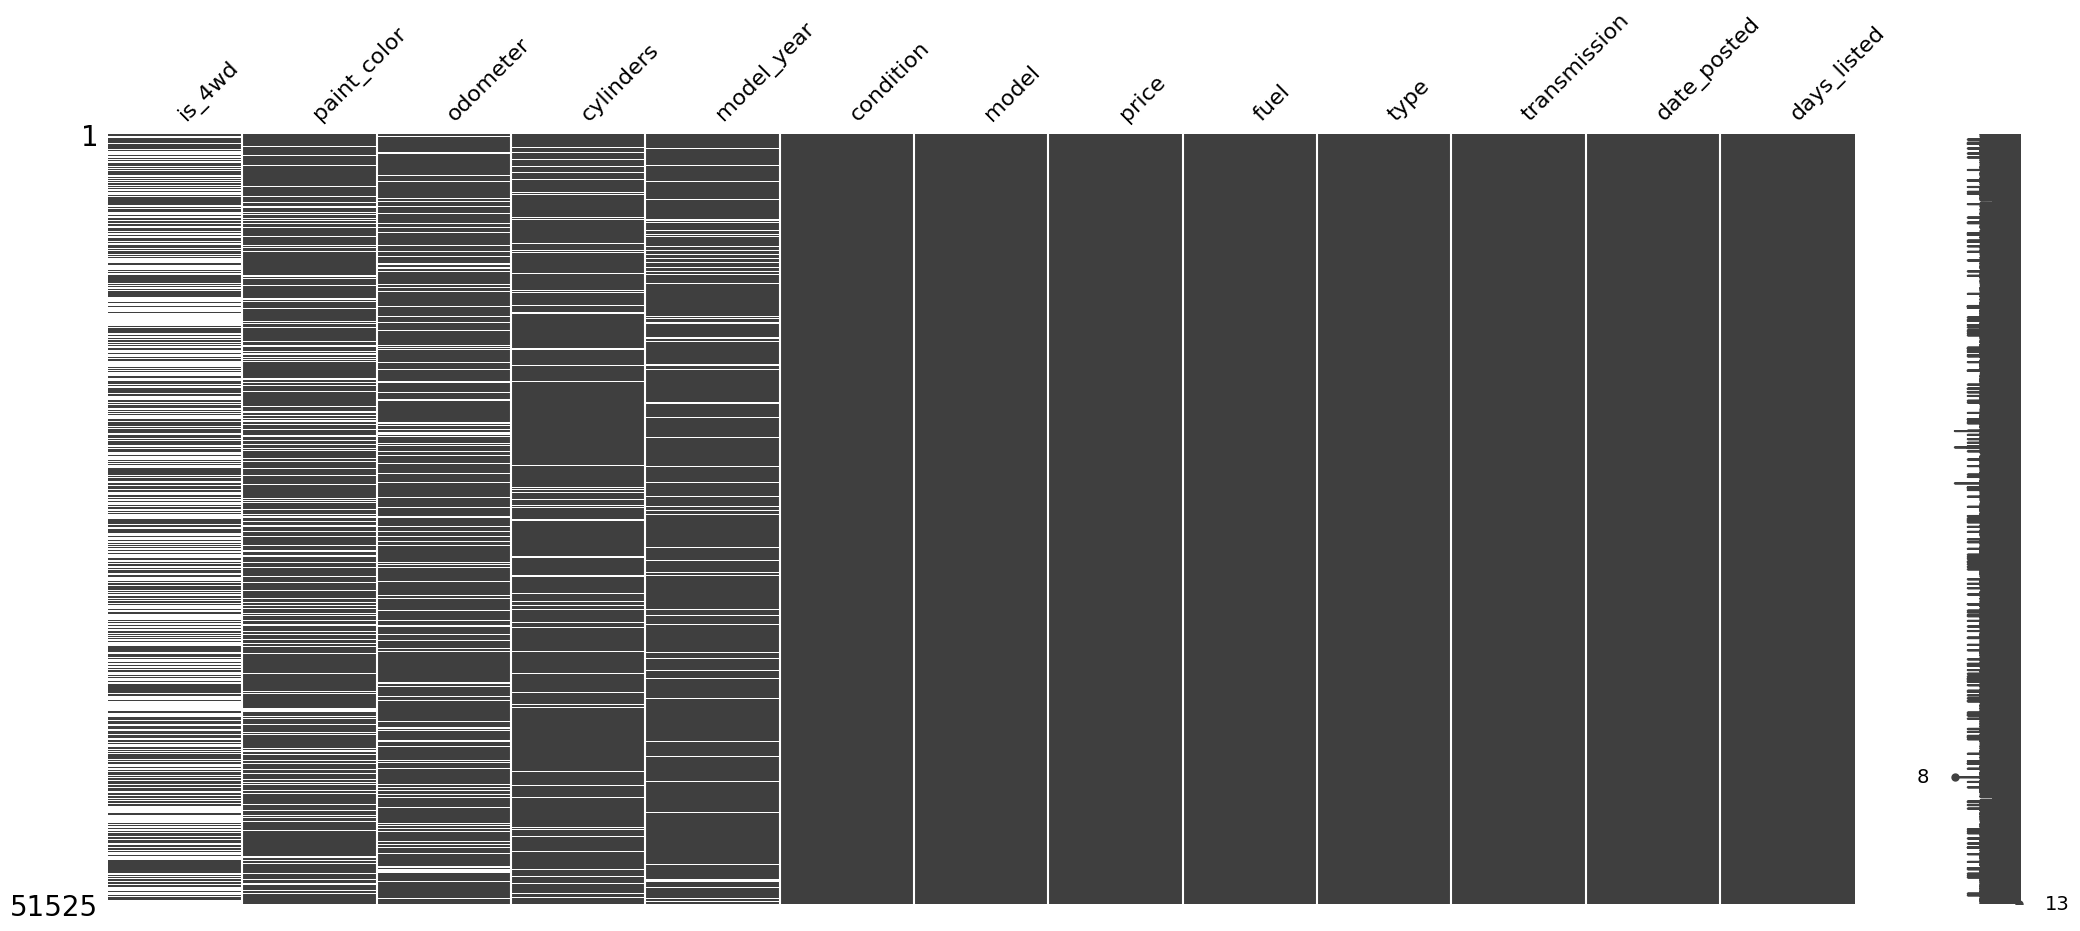

In [55]:
# visualización de valores NaN
# Calcular el porcentaje de valores nulos por columna
null_percent = df.isnull().mean() * 100

# Ordenar las columnas por porcentaje de valores nulos de mayor a menor
sorted_null_percent = null_percent.sort_values(ascending=False)

# Reordenar el DataFrame según las columnas ordenadas
df_sorted = df[sorted_null_percent.index]

# Visualizar el gráfico de barras ordenado
msno.matrix(df_sorted)

plt.show()



Como se observa en el gráfico el campo con más valores nulos es 4x4, seguido de el color de la pintura y el odometro.

In [115]:
df.head(3)

price  model_year           model condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5      good        6.0  gas  145000.0   
1  25500         NaN      ford f-150      good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata  like new        4.0  gas  110000.0   

  transmission    type paint_color  is_4wd date_posted  days_listed    brand  
0    automatic     SUV         NaN     1.0  2018-06-23           19      bmw  
1    automatic  pickup       white     1.0  2018-10-19           50     ford  
2    automatic   sedan         red     NaN  2019-02-07           79  hyundai

In [51]:
#registros duplicados
df.duplicated().sum()

np.int64(0)

In [52]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [62]:
px.strip(df, x = 'price', hover_name= 'model', color = 'type', 
         title= 'Precio de autos de acuerdo a su categoría')


Los vehículos mas costosos son aquellos del tipo camioneta, SUV y coupe, se observa un valor atípico de una pickup Nissan Frontier con respecto al resto de los datos.

In [71]:
# histograma de kilometraje
fig = px.histogram(df, x="odometer", title= 'Kilometraje')
fig.update_xaxes(range = [0, 500000])
fig.show()



Se observa una distribución con sesgo positivo, en la cual la mayoría de los vehículos presentan un kilometraje aproximado entre 98,000 y 122,000 kilómetros. A continuación, procederé a elaborar un gráfico de caja para visualizar de manera más clara la concentración de los datos.

In [109]:
# boxplot
fig = px.box(df, y="odometer", title= "Kilometraje de autos")
fig.show()


Confirmamos que la mayor parte de nuestra muestra se concentra en un rango de 70,000 a 155,000 kilómetros, con una mediana de 113,000 kilómetros. Esta mediana debería considerarse también como la media, debido a la presencia de valores atípicos. ¿Pero, que hay si quisieramos conocer la distribución de kilometros recorridos por modelo de autos?

In [114]:
# aplicamos ingeniería de características para agregar una nueva columna al df donde únicamente este el modelo del auto
df['brand'] = df['model'].str.split(' ').str.get(0) 
df.head(3)

price  model_year           model condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5      good        6.0  gas  145000.0   
1  25500         NaN      ford f-150      good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata  like new        4.0  gas  110000.0   

  transmission    type paint_color  is_4wd date_posted  days_listed    brand  
0    automatic     SUV         NaN     1.0  2018-06-23           19      bmw  
1    automatic  pickup       white     1.0  2018-10-19           50     ford  
2    automatic   sedan         red     NaN  2019-02-07           79  hyundai

In [116]:
# boxplot
fig = px.box(df, y="odometer", x = 'brand',title= "Kilometraje de autos")
fig.show()


Las marcas que tienen un menor kilometraje en base a su mediana es Nissan y Volkswagen. Cabe destacar que los datos del odometro de la marca mercedes-benz no se encuentran se registraron.

In [122]:
# validación de valores NaN en el campo de 'odomete' en la marca Mercedes-Benz
mercedes = df.query('brand == "mercedes-benz"')
mercedes.odometer.nunique()

0

In [91]:
# conteo de los autos para comparar su condición
autos_condicion = df['condition'].value_counts().reset_index()
autos_condicion.columns = ['condition', 'count']

fig = px.pie(autos_condicion, values='count', names='condition', title='Estado de autos')
fig.show()

La mayoría de los autos en este dataset son autos en buena condición.

In [107]:
# conteo de los autos para comparar su transmisión
autos_transmisión = df['transmission'].value_counts().reset_index()
autos_transmisión.columns = ['transmission', 'count']
fig = px.treemap(autos_transmisión, path=['transmission'], names='transmission', values='count',
                 title='Transmisión de autos')
fig.show()

In [90]:
print(autos_condicion)

   condition  count
0  excellent  24773
1       good  20145
2   like new   4742
3       fair   1607
4        new    143
5    salvage    115
